<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-1">Dependencies</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2">Functions</a></span></li><li><span><a href="#Paths" data-toc-modified-id="Paths-3">Paths</a></span></li><li><span><a href="#Main" data-toc-modified-id="Main-4">Main</a></span></li><li><span><a href="#PCA" data-toc-modified-id="PCA-5">PCA</a></span></li></ul></div>

# Dependencies

In [1]:
library(ggplot2)

In [2]:
library(ggbiplot)

Loading required package: plyr

Warning message:
“package ‘plyr’ was built under R version 4.0.5”
Loading required package: scales

Loading required package: grid



# Functions

In [3]:
source("/Users/anabbi/git/ped_CapTCRseq/R/Immune_diversity.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/Misc_functions.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/ggplot2_theme.R")

# Paths

In [4]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"

gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"

# Main

In [5]:
load(file = paste0(gitpath, "data/pbmc_sampleprocessing.RData"))

In [6]:
metadata <- read.csv(file = paste0(datapath, "INT_metadata_flow.csv"),header = T, stringsAsFactors = F)

In [7]:
load(file = paste0(datapath,"capTCRseq/divstats_lst_TRA.RData"))
load(file = paste0(datapath,"capTCRseq/divstats_lst_TRB.RData"))

In [9]:
myfreq <- as.data.frame(table(divstats_lst_TRB$PBMC$Patient.y), stringsAsFactors = F)

In [10]:
myfreq$disease_type <- metadata$Disease_type[ match(myfreq$Var1, metadata$Patient)]

In [12]:
morethan1 <- myfreq[ myfreq$Freq > 1,]

In [21]:
sum(divstats_lst_TRB$PBMC$TRB, na.rm = T)

[1] 66263

In [28]:
sum(divstats_lst_TRA$PBMC$TRA, na.rm = T)

[1] 149302

In [27]:
sum(!is.na(divstats_lst_TRB$PBMC$Patient.y))

[1] 260

In [22]:
summary(divstats_lst_TRB$PBMC$TRB, na.rm = T)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    1.0    56.0   135.5   254.9   356.5  2237.0     333 

In [29]:
summary(divstats_lst_TRA$PBMC$TRA, na.rm = T)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    2.0   122.0   278.5   574.2   768.2  5219.0     333 

In [8]:
table($Patient)


  CHP_10YO-M   CHP_11YO-M CHP_15YO-F-A CHP_15YO-F-B   CHP_15YO-M   CHP_16YO-M 
           1            1            1            1            1            1 
 CHP_1YO-M-A  CHP_1YO-M-B    CHP_2YO-M      CHP_303      CHP_315      CHP_319 
           1            1            1            1            1            1 
     CHP_323      CHP_324      CHP_326      CHP_328      CHP_329      CHP_330 
           5            3            1            1            2            2 
     CHP_331      CHP_333      CHP_334      CHP_335      CHP_336      CHP_337 
           3            1            3            3            4            4 
     CHP_338      CHP_339      CHP_340      CHP_341      CHP_342      CHP_343 
           4            4            6            1            2            7 
     CHP_344      CHP_345      CHP_346      CHP_347      CHP_348      CHP_349 
           9            6            1            8            9            3 
     CHP_350      CHP_351      CHP_352      CHP_353

In [8]:
head(pbmc_samples)

,sample_id,Shipped,DNAextracted,DNAused,libbatch,librarypassed,Library preparation,libraryyield,captureyield,capbatch,capturepassed,Successful capture,deepseq,Deep sequencing,mysample_id,TCR,TCR analysis,Patient,Tumor,Group
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,330-05,n = 320,6160,600,190517_M04827_0203_000000000-D6BYT,Passed,n = 281,825.6,155.42,190624_M04827_0214_000000000-D6F66,Passed,n = 277,Yes,n = 277,CHP_330_05,Yes,n = 253,CHP_330,OS,Solid
2,331-05,n = 320,3780,600,190517_M04827_0203_000000000-D6BYT,Passed,n = 281,1161.6,162.64,190624_M04827_0214_000000000-D6F66,Passed,n = 277,Yes,n = 277,CHP_331_05,Yes,n = 253,CHP_331,SR ALL,Leukemia
3,331-04,n = 320,9700,600,190517_M04827_0203_000000000-D6BYT,Passed,n = 281,1555.2,162.64,190624_M04827_0214_000000000-D6F66,Passed,n = 277,Yes,n = 277,CHP_331_04,Yes,n = 253,CHP_331,SR ALL,Leukemia
4,338-05,n = 320,1410,600,190517_M04827_0203_000000000-D6BYT,Passed,n = 281,508.8,328.70,190624_M04827_0214_000000000-D6F66,Passed,n = 277,Yes,n = 277,CHP_338_05,Yes,n = 253,CHP_338,AML,Leukemia
5,338-04,n = 320,2460,600,190517_M04827_0203_000000000-D6BYT,Passed,n = 281,883.2,328.70,190624_M04827_0214_000000000-D6F66,Passed,n = 277,Yes,n = 277,CHP_338_04,Yes,n = 253,CHP_338,AML,Leukemia
6,342-04,n = 320,1650,600,190517_M04827_0203_000000000-D6BYT,Passed,n = 281,960.0,144.02,190624_M04827_0214_000000000-D6F66,Passed,n = 277,Yes,n = 277,CHP_342_04,Yes,n = 253,CHP_342,AML,Leukemia


In [9]:
divstats_pbmc <- divstats[ divstats$Sample == "PBMC",]

In [10]:
dim(divstats_pbmc)

[1] 265  24

In [11]:
all <- merge(pbmc_samples, divstats_pbmc, by.x = "mysample_id", by.y = "sample_id")

In [12]:
dim(all)

[1] 254  43

In [13]:
colnames(all)

[1] "mysample_id"         "sample_id"           "Shipped"            
 [4] "DNAextracted"        "DNAused"             "libbatch"           
 [7] "librarypassed"       "Library preparation" "libraryyield"       
[10] "captureyield"        "capbatch"            "capturepassed"      
[13] "Successful capture"  "deepseq"             "Deep sequencing"    
[16] "TCR"                 "TCR analysis"        "Patient.x"          
[19] "Tumor"               "Group.x"             "TRB"                
[22] "Reads"               "CPKR"                "Average_reads"      
[25] "VMR"                 "Max_reads"           "Singletons"         
[28] "Doubletons"          "qD"                  "Sample_Coverage"    
[31] "observed_Richness"   "estimated_Richness"  "SE_Richeness"       
[34] "observed_Shannon"    "estimated_Shannon"   "SE_Shannon"         
[37] "observed_Simpson"    "estimated_Simpson"   "SE_Simpson"         
[40] "Sample"              "Group.y"             "Patient.y"          
[43] "Cycle"

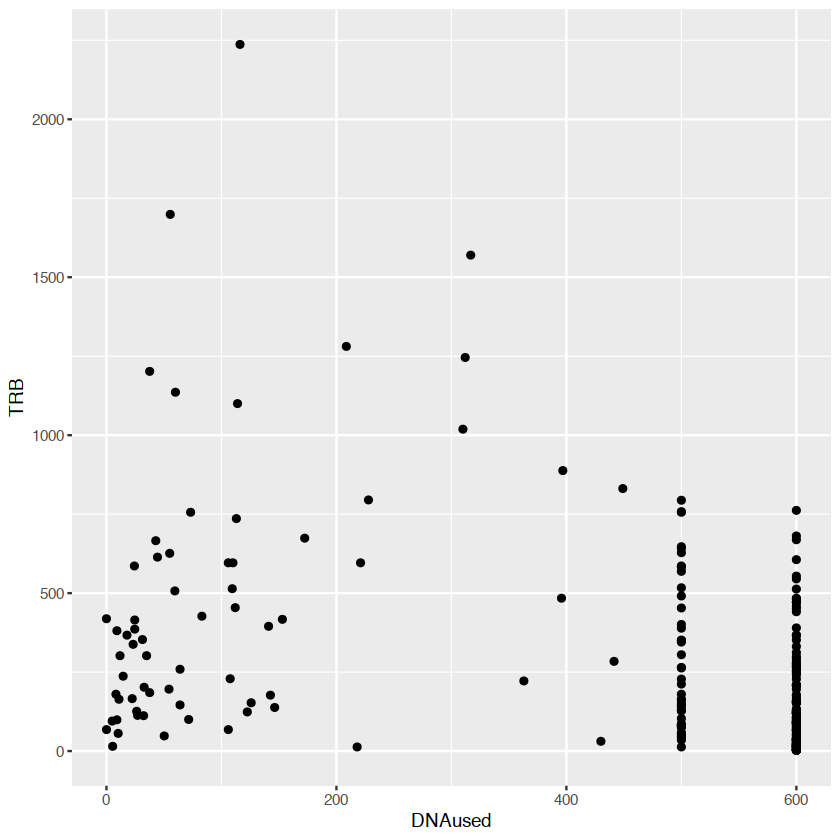

In [14]:
ggplot(data = all, aes( x = DNAused, y = TRB)) + geom_point()

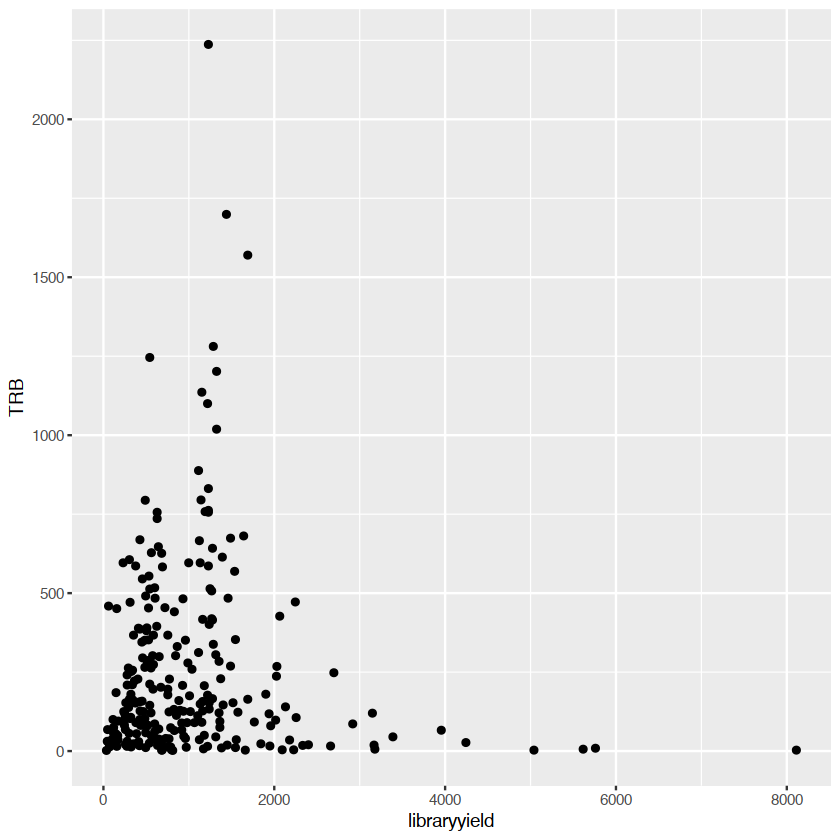

In [15]:
ggplot(data = all, aes( x = libraryyield, y = TRB)) + geom_point()

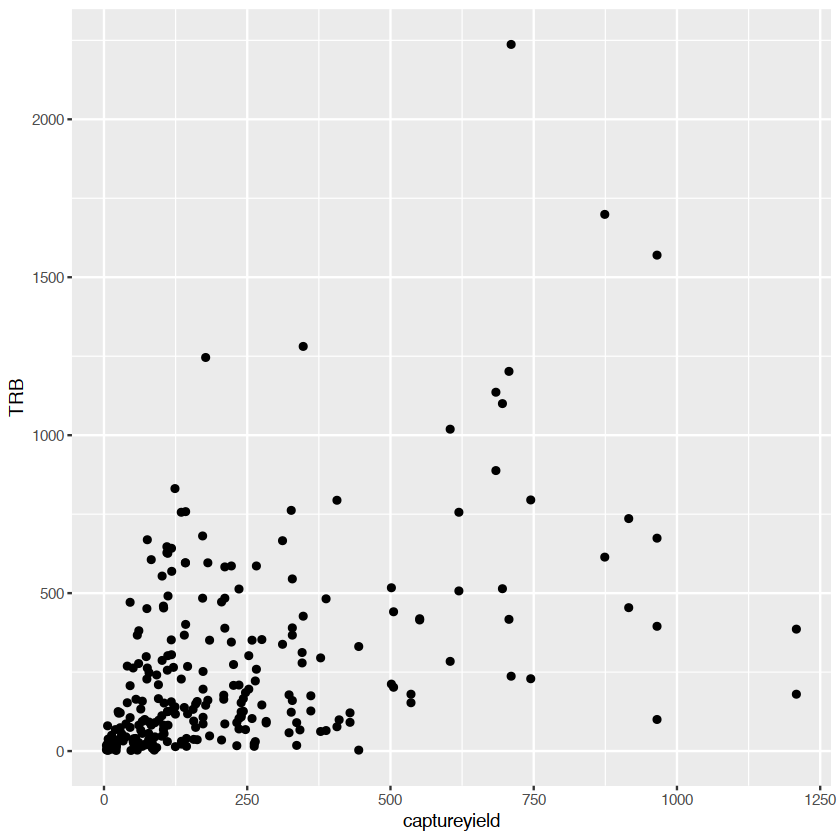

In [95]:
ggplot(data = all, aes( x = captureyield, y = TRB)) + geom_point()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



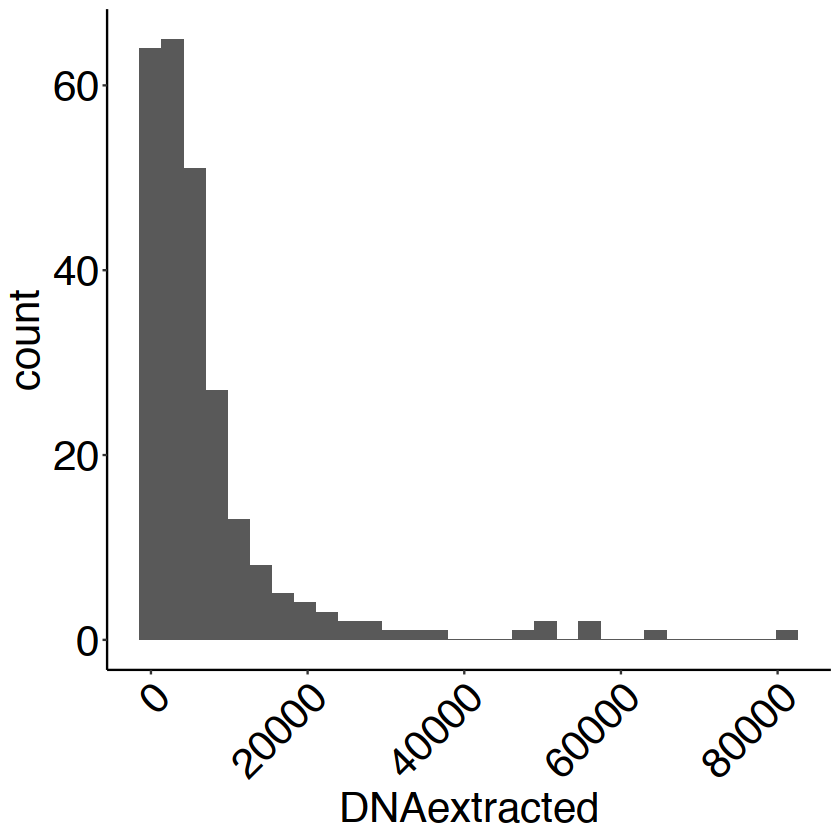

In [107]:
histp(all, "DNAextracted")

In [19]:
p <- ggplot(data = all, aes( x = capbatch, y = TRB)) + geom_boxplot() + myplot + myaxis

In [20]:
p1 <- ggplot(data = all, aes( x = libbatch, y = TRB)) + geom_boxplot() + myplot + myaxis

In [21]:
pdf(paste0(plotpath, "qc_libbatch.pdf"),
    width = 40, height = 40)
p1
dev.off()

pdf 
  2

In [22]:
pdf(paste0(plotpath, "qc_capbatch.pdf"),
    width = 40, height = 40)
p
dev.off()

pdf 
  2

# PCA

In [23]:
colnames(all)

[1] "mysample_id"         "sample_id"           "Shipped"            
 [4] "DNAextracted"        "DNAused"             "libbatch"           
 [7] "librarypassed"       "Library preparation" "libraryyield"       
[10] "captureyield"        "capbatch"            "capturepassed"      
[13] "Successful capture"  "deepseq"             "Deep sequencing"    
[16] "TCR"                 "TCR analysis"        "Patient.x"          
[19] "Tumor"               "Group.x"             "TRB"                
[22] "Reads"               "CPKR"                "Average_reads"      
[25] "VMR"                 "Max_reads"           "Singletons"         
[28] "Doubletons"          "qD"                  "Sample_Coverage"    
[31] "observed_Richness"   "estimated_Richness"  "SE_Richeness"       
[34] "observed_Shannon"    "estimated_Shannon"   "SE_Shannon"         
[37] "observed_Simpson"    "estimated_Simpson"   "SE_Simpson"         
[40] "Sample"              "Group.y"             "Patient.y"          
[43] "Cycle"

In [96]:
all_subset <- all[ all$DNAused == 600,]

In [97]:
summary(all$DNAused)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0   405.2   600.0   454.5   600.0   600.0 

In [101]:
forpca <- all_subset[c("DNAextracted", "libraryyield", "captureyield", "TRB", "Reads")]

In [102]:
mycancers <- all_subset$Tumor
mylibbatch <- all_subset$libbatch
mycapbatch <- all_subset$capbatch

In [103]:
my.pca <- prcomp(forpca, center = T, scale. = T) 

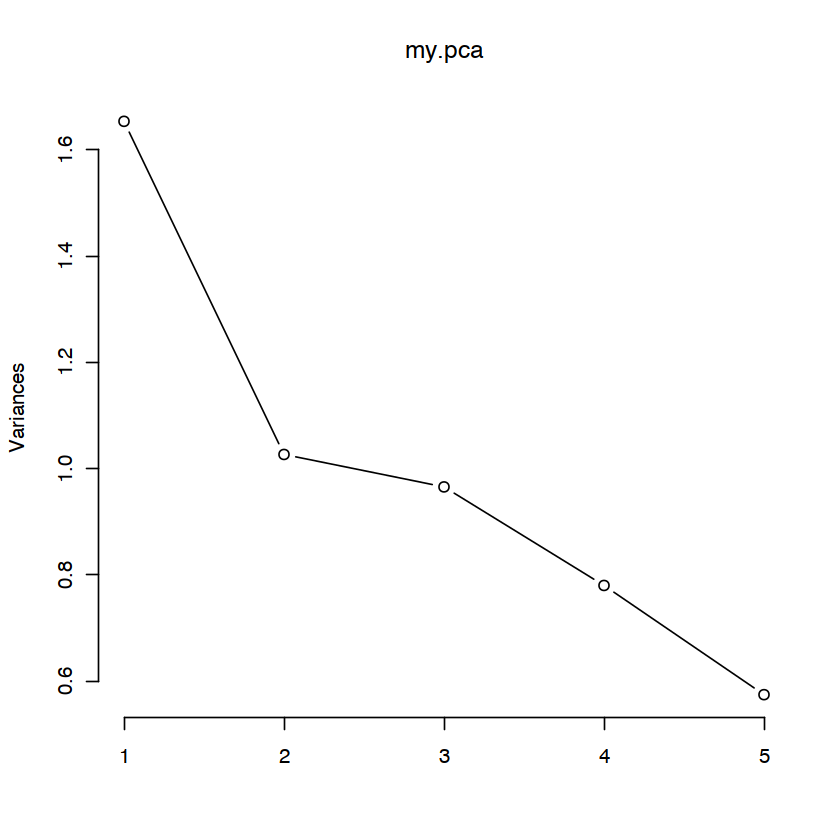

In [104]:
plot(my.pca, type = "l")

In [105]:
g <- ggbiplot(my.pca, #obs.scale = 1, var.scale = 1, 
              groups = mycapbatch, ellipse = TRUE, var.axes = TRUE,
              circle = FALSE) + myplot + myaxis + theme(legend.position = "none")# + scale_color_viridis_b()

In [106]:
pdf(paste0(plotpath, "pca_plot.pdf"),
    width = 20, height = 20)
g
dev.off()

pdf 
  2